### `HBDSCAN Clustering`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import hdbscan



from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from IPython.display  import display_html
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split



%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
digits = load_digits()
data = digits.data

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target,test_size=0.33, random_state=42)


In [5]:
clusterer= hdbscan.HDBSCAN(min_cluster_size=12, min_samples=1,prediction_data=True)
clusterer.fit(digits.data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=12, min_samples=1, p=None,
    prediction_data=True)

In [6]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]
lambda_value = list(set(cluster_tree['lambda_val'].values))
lambda_value.append(0.03)
sorted_list = sorted(lambda_value)


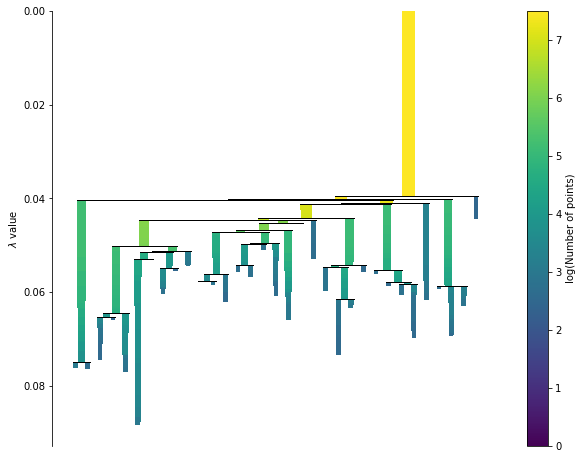

In [7]:
plt.figure(figsize=(10,8))
clusterer.condensed_tree_.plot(log_size=True)

In [8]:
indices = []
for i in range(0,len(X_test)):
    for j in range(0,len(digits.data)):
        a = np.equal(X_test[i], digits.data[j]).all()
        if a == True:
            indices.append(j)
            
            

In [9]:
def assign_label(cluster_label):
    dict_label ={'0': np.array([5]),'1': np.array([7,5]), '2':np.array([7,5,7]),
             '3':np.array([0,7,5,7]), '4': np.array([0,7,1,5,7]),'5': np.array([0,7,1,2,5,7]),
             '6': np.array([4,0,7,1,2,5,7]), '7':np.array([4,0,9,1,2,5,7]),'8':np.array([4,0,9,1,2,5,6,7]),
            '9': np.array([4,0,3,9,1,2,5,6,7]), '10':np.array([4,0,9,1,2,5,6,3,7]), 
            '11':np.array([4,0,9,9,1,2,5,6,3,7]), '12': np.array([5,4,0,9,9,1,2,5,6,3,7]),
             '13':np.array([5,4,0,9,9,1,2,5,5,6,3,7]), '14':np.array([5,4,0,9,9,1,2,5,6,5,1,3,7]),
            '15':np.array([5,8,4,0,9,9,1,2,5,6,1,3,7]),'16':np.array([1,5,8,4,0,9,9,1,2,5,6,1,3,7]),
            '17':np.array([1,5,8,4,0,9,1,2,5,6,1,3,7]),'18':np.array([1,5,8,4,0,9,1,2,5,4,6,1,3,7]),
            '19':np.array([1,5,5,8,4,0,9,1,2,5,4,6,1,3,7]),'20':np.array([1,5,5,4,0,4,9,1,2,5,4,6,1,3,7]),
            '21': np.array([1,5,5,4,0,4,9,1,2,5,4,6,1,1,3,7]),'22':np.array([1,5,5,4,0,4,2,9,1,2,5,4,6,1,1,3,7]),
            '23':np.array([1,5,4,0,4,9,9,1,2,5,6,1,3,7]), '24':np.array([9,1,5,4,0,4,9,9,1,2,6,1,3,7]),
             '25':np.array([1,5,4,0,4,2,9,1,2,6,1,9,3,7]),'26':np.array([1,5,4,0,4,2,2,9,1,2,6,1,9,3,7]),
            '27': np.array([1,5,4,0,4,7,2,2,9,1,2,6,1,3,7]), '28':np.array([1,5,4,0,4,7,2,9,1,2,6,7,1,3,7]), 
             '29':np.array([4,0,4,9,1,6,7,1,2,3,7]), '30':np.array([0,4,6,7,1,2,3]),
             '31':np.array([0,6,4,6,7,1,6,2,3]),'32': np.array([6,0,1,0])}


    return dict_label.get(str(cluster_label))

In [10]:
def classifier(l,index):
    pred_labels = []
    clusterpt_cut= clusterer.single_linkage_tree_.get_clusters(1/sorted_list[l], min_cluster_size=12)
    #s=assign_label(l)
    b= clusterpt_cut[index]
    for i in range(0,len(b)):
        if b[i] == -1:
            pred_labels.append(-1)
        else:
            pred_labels.append(assign_label(l)[b[i]])
    return np.array(pred_labels)
    

In [11]:
def labels_testdata(l,index):
    top_cluster = classifier(0,indices)
    if l==0:
        return top_cluster
    else:
    
        for i in range(1,l+1):
            next_cluster = classifier(i,indices)
            noiseptindex = np.argwhere(next_cluster == -1).reshape(1,-1)[0]
            for f in noiseptindex:
                next_cluster[f]= top_cluster[f]
            top_cluster = next_cluster
    return next_cluster
            
        

In [12]:
def accuracy(num_cut):
    acc_lst =[]
    for j in range(0,num_cut):
        acc_lst.append(len(np.argwhere(np.equal(Y_test,labels_testdata(j,indices))== True))/len(Y_test))
    return acc_lst

### ` Below is the accuracy at each lambda value`

In [26]:
df_acc = pd.DataFrame(sorted_list, columns = ['lambda'])
df_acc['Accuracy'] =accuracy(33)

In [27]:
df_acc

,lambda,Accuracy
0,0.030000,0.122896
1,0.039559,0.129630
2,0.040193,0.223906
3,0.040291,0.316498
4,0.040996,0.335017
5,0.041204,0.415825
6,0.044237,0.516835
7,0.044544,0.526936
8,0.044632,0.617845
9,0.045268,0.627946


`From lambda value = 0.51232 downwards we notice that the accuracy becomes stable as no new information is obtain.`